In [51]:
import pandas as pd
import os

# eA + S1 + S2 + S3

In [52]:
mgrm_file = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_eA_S123.txt"
gcta_file = "/data/jerrylee/tools/gcta64"
pheno_path = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype"
out_path = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/UKB"

In [53]:
fns = os.listdir(pheno_path)
len(fns)

106

In [54]:
# for fn in fns:
fn = "Urate.phen"
pheno = fn.split(".")[0]
pheno_file = os.path.join(pheno_path, fn)
out_file = f"{out_path}/{pheno}.eA+S1+S2+S3"
cmd = f"{gcta_file} --reml --mgrm {mgrm_file} --pheno {pheno_file} --out {out_file} --thread-num 10"
os.system(cmd)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.94.0 beta Linux
* (C) 2010-present, Jian Yang, The University of Queensland
* Please report bugs to Jian Yang <jian.yang.qt@gmail.com>
*******************************************************************
Analysis started at 15:40:50 KST on Thu Nov 28 2024.
Hostname: h4

Accepted options:
--reml
--mgrm /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_eA_S123.txt
--pheno /data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen
--out /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/UKB/Urate.eA+S1+S2+S3
--thread-num 10

Note: the program will be running on 10 threads.

Reading phenotypes from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].
Non-missing phenotypes of 436050 individuals are included from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].

There are 4 GRM file names specified in the file [/data/jerr

256

In [55]:
pheno = fn.split(".")[0]
pheno_file = os.path.join(pheno_path, fn)
out_file = f"{out_path}/{pheno}.eA+S1+S2+S3"
cmd = f"{gcta_file} --reml --mgrm {mgrm_file} --pheno {pheno_file} --out {out_file} --reml-no-constrain --thread-num 10"
os.system(cmd)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.94.0 beta Linux
* (C) 2010-present, Jian Yang, The University of Queensland
* Please report bugs to Jian Yang <jian.yang.qt@gmail.com>
*******************************************************************
Analysis started at 15:41:17 KST on Thu Nov 28 2024.
Hostname: h4

Accepted options:
--reml
--mgrm /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_eA_S123.txt
--pheno /data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen
--out /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/UKB/Urate.eA+S1+S2+S3
--reml-no-constrain
--thread-num 10

Note: the program will be running on 10 threads.

Reading phenotypes from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].
Non-missing phenotypes of 436050 individuals are included from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].

There are 4 GRM file names specified in 

2

# Source of instability

In [56]:
import pandas as pd
import numpy as np
# from scipy.linalg import cholesky, cho_solve, solve
import sys; sys.path.append("/data/jerrylee/pjt/BIGFAM.v.2.0/src")
from reml_utils import *

In [57]:
# Load GRM matrixs
def load_grm(base_path):
    # GRM path
    grm_id_fn = f"{base_path}.grm.id"
    grm_bin_fn = f"{base_path}.grm.bin"
    
    # read ID file
    ids = np.loadtxt(grm_id_fn, dtype='S10')
    if len(ids.shape) > 1:
        ids = ids[:, 1]
    
    # ID dictionary (ID : index)
    N = len(ids)
    id_dict = {ids[i].decode("utf-8"): i for i in range(N)}
    
    # read GRM
    R = np.zeros((N, N), dtype=np.float32)
    R[np.tril_indices(N)] = np.fromfile(grm_bin_fn, dtype=np.float32)
    R = R + R.T
    R[np.diag_indices(N)] = np.diag(R) / 2.0
    
    return id_dict, R

id_dict = {}
GRM = {}

for mgrm in ["eA_123", "S1_123", "S2_123", "S3_123"]:
    ids, R = load_grm(
        f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.{mgrm}"
    )
    id_dict[mgrm] = ids
    GRM[mgrm] = R
    
# id_dict to dataframe
# 첫 번째 key의 DataFrame을 기준으로 생성
first_key = list(id_dict.keys())[0]
df_base = pd.DataFrame(
    [(k, v) for k, v in id_dict[first_key].items()],
    columns=['eid', 'index']
).sort_values('index').reset_index(drop=True)

# 나머지 key들의 DataFrame과 비교 검증
for key in id_dict.keys():
    df_current = pd.DataFrame(
        [(k, v) for k, v in id_dict[key].items()],
        columns=['eid', 'index']
    ).sort_values('index').reset_index(drop=True)
    
    # DataFrame 일치성 검증
    if not df_base.equals(df_current):
        raise ValueError(f"DataFrame for {key} doesn't match with the base DataFrame ({first_key})")
    
print("모든 key의 (eid, index) 쌍이 일치합니다.")
df_id = df_base.astype({"eid": int})

모든 key의 (eid, index) 쌍이 일치합니다.


In [58]:
# load phenotye
df_pheno = pd.read_csv(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Body_mass_index__BMI_.phen",
    sep="\t",
    names = ["eid", "iid", "pheno"]
)

df_pheno.head()


,eid,iid,pheno
0,1000012,1000012,0.724382
1,1000029,1000029,0.474666
2,1000031,1000031,-0.281045
3,1000047,1000047,0.221507
4,1000068,1000068,3.951098


In [59]:
# 2. Filter df_id based on phenotype samples
df_id = df_id[df_id['eid'].isin(df_pheno['iid'])]
df_id = df_id.sort_values('index').reset_index(drop=True)

# 3. Sort df_pheno to match df_id order
df_pheno = df_pheno[df_pheno['iid'].isin(df_id['eid'])]
df_pheno = df_pheno.set_index('iid').loc[df_id['eid']].reset_index()

# 4. Filter GRM matrices
remaining_indices = df_id['index'].values
for key in GRM.keys():
    GRM[key] = GRM[key][remaining_indices][:, remaining_indices]

# Check results
print(f"Final sample size: {len(df_id)}")
print("\nFirst 5 rows of df_pheno:")
print(df_pheno.head())
print("\nGRM matrix dimensions:")
for key in GRM.keys():
    print(f"{key}: {GRM[key].shape}")

Final sample size: 5914

First 5 rows of df_pheno:
       iid      eid     pheno
0  1000286  1000286 -0.760615
1  1002044  1002044 -1.920036
2  1002166  1002166 -1.525732
3  1003002  1003002 -0.019712
4  1003779  1003779  0.114639

GRM matrix dimensions:
eA_123: (5914, 5914)
S1_123: (5914, 5914)
S2_123: (5914, 5914)
S3_123: (5914, 5914)


In [60]:
grm = [GRM[key] for key in GRM.keys()]
h0 = np.repeat(1 / (len(grm) + 1), (len(grm) + 1))
pheno = df_pheno["pheno"]

gcta_fs = aiREML(grm, pheno, h0, max_iter=10, verbose = True)

Perform a single iteration of EM-based REML to initiate parameters
LogLike V(G) V(e)
Iterate AI REML until convergence
-2886.5338703706216 0.7413912721828728 0.0001
-2872.6340894331543 0.48464127218287284 0.049475000000000005
-2896.8969373323025 0.7713248659328729 0.0001
-4146.445781076678 0.0001 1.2501
-2928.738474173234 0.0001 0.0001
-3191.2086068620956 0.0001 0.3951
-5404.24470674832 0.0001 3.1451000000000002
-10039.087206965694 24.0001 0.0001
-26076.488882965452 7192.0001 0.0001
-52843.01787981224 0.0001 0.0001


KeyboardInterrupt: 

## EM step 

In [61]:
A = grm; y = pheno; Var = h0; X = None

# N = float(len(y))
N = len(y)

# Add matrix of residuals to A
if type(A) == list:
    A = A + [np.eye(N)]
else:
    A = [A, np.eye(N)]
r = len(A)

AI = np.zeros((r, r))
s = np.zeros((r, 1))

l_dif = 10
it = 0

Var = np.var(y) * Var

# Perform a single iteration of EM-based REML to initiate parameters
print("Perform a single iteration of EM-based REML to initiate parameters", flush=True)
V = sum(A[i] * Var[i] for i in range(r))

P, XtVinvX = get_terms(X, V)
logL = ll(y, X, P, V, XtVinvX)

for i in range(r):
    vi2 = Var[i]
    vi4 = vi2**2
    Ai = A[i]
    Var[i] = (vi4 * dots([y.T, P, Ai, P, y]) + np.trace(vi2 * np.eye(N) - vi4 * P.dot(Ai)) ) / N

Var = isin_constraint(Var)

V = sum(A[i] * Var[i] for i in range(r))

P, XtVinvX = get_terms(X, V)
logL = ll(y, X, P, V, XtVinvX)

Perform a single iteration of EM-based REML to initiate parameters


In [62]:
Var

array([0.19826627, 0.19927865, 0.19647221, 0.19660347, 0.19946768])

## AI step


In [63]:
import math
import numpy.linalg as la

In [64]:
max_iter=10
verbose = True; bounded = False

print("Iterate AI REML until convergence", flush=True)
while it < max_iter and ( math.fabs(l_dif) >= 10E-4 or (math.fabs(l_dif) < 10E-2 and l_dif < 0) ):
    it = it + 1

    # Average information matrix
    for i in range(r):
        for j in range(r):
            # this is really just to slightly optimize...
            # Ai, Aj == I in the (r - 1) cases
            if i == (r - 1) and j == (r - 1):
                AI[i, j] = dots([y.T, P, P, P, y]) 
            elif i == (r - 1):
                AI[i, j] = dots([y.T, P, P, A[j], P, y]) 
            elif j == (r - 1):
                AI[i, j] = dots([y, P, A[i], P, P, y])    
            else:
                AI[i, j] = dots([y.T, P, A[i], P, A[j], P, y])  

    AI = 0.5 * AI

    # Vector of first derivatives of log likelihood function
    for i in range(r):
        # this is really just to slightly optimize...
        # Ai == I in the (r - 1) cases
        if i == (r - 1):
            s[i, 0] = np.trace(P) - dots([y.T, P, P, y]) 
        else:
            Ai = A[i]
            s[i, 0] = np.trace(P.dot(Ai)) - dots([y.T, P, Ai, P, y ])

    s = -0.5 * s

    # Check condition number of AI matrix
    cond_num = np.linalg.cond(AI)
    
    # Check eigenvalues of AI matrix
    eigenvals = np.linalg.eigvals(AI)
    
    # Monitor update step size
    delta = la.inv(AI).dot(s)
    step_size = np.linalg.norm(delta)
    
    if verbose:
        print(f"Iteration {it}:")
        print(f"Condition number: {cond_num}")
        print(f"Eigenvalues range: {eigenvals.min()} to {eigenvals.max()}")
        print(f"Update step size: {step_size}")
        print(f"LogL: {logL}")
        print(f"Var: {Var}\n")
        
        
    # New variance components from AI and likelihood
    if l_dif > 1:
        # adjust for incomplete tagging according to GCTA-paper's coefficient
        Var = (Var + 0.316 * la.inv(AI).dot(s).T)[0]
    else:
        Var = (Var + la.inv(AI).dot(s).T)[0]

    Var = isin_constraint(Var)

    # Re-calculate V and P matrix
    V = sum(A[i] * Var[i] for i in range(r))

    # Likelihood of the MLM
    P, XtVinvX = get_terms(X, V)
    new_logL = ll(y, X, P, V, XtVinvX)
    l_dif = new_logL - logL
    logL = new_logL

    # if verbose:
    #     print(logL, Var, flush=True)

    if bounded:
        if min(Var/sum(Var)) < 0:
            break


Iterate AI REML until convergence
Iteration 1:
Condition number: 2.032427848187888e+17
Eigenvalues range: 4.61780141494571e-13 to 15521.932005448247
Update step size: 2.064736973819457
LogL: -2900.7813739368544
Var: [0.19826627 0.19927865 0.19647221 0.19660347 0.19946768]

Iteration 2:
Condition number: 6.9790830779494776e+16
Eigenvalues range: -4.064632485657972e-13 to 11998.110723318921
Update step size: 0.9023691149032362
LogL: -2886.5338703706216
Var: [7.41391272e-01 1.00000000e-04 1.13159582e-02 7.81034679e-02
 2.41745028e-01]

Iteration 3:
Condition number: 2.4358076660263434e+17
Eigenvalues range: 1.988350564296144e-12 to 15692.718285240213
Update step size: 1.080636692303778
LogL: -2872.6340894331543
Var: [0.48464127 0.049475   0.02612846 0.05835347 0.35283878]

Iteration 4:
Condition number: 1.627392323507322e+16
Eigenvalues range: -5.114302338976568e-13 to 9984.582236388493
Update step size: 3.2488730017115164
LogL: -2896.8969373323025
Var: [7.71324866e-01 1.00000000e-04 1.00

# eA + S (given $w_s$)

In [65]:
cohort = "UKB"

In [75]:
# mgrm_file = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/{cohort}.mgrm_ws.txt"
mgrm_file = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/{cohort}.mgrm_eA_S_ws_100.txt"
gcta_file = "/data/jerrylee/tools/gcta64"
pheno_path = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/{cohort}/phenotype"
out_path = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/ws"

In [76]:
fns = os.listdir(pheno_path)
len(fns)

106

In [77]:
# for fn in fns:
fn = "Urate.phen"
pheno = fn.split(".")[0]
pheno_file = os.path.join(pheno_path, fn)
out_file = f"{out_path}/{cohort}.{pheno}.ws_1_1"
cmd = f"{gcta_file} --reml --mgrm {mgrm_file} --pheno {pheno_file} --out {out_file} --thread-num 10"
os.system(cmd)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.94.0 beta Linux
* (C) 2010-present, Jian Yang, The University of Queensland
* Please report bugs to Jian Yang <jian.yang.qt@gmail.com>
*******************************************************************
Analysis started at 15:58:37 KST on Thu Nov 28 2024.
Hostname: h4

Accepted options:
--reml
--mgrm /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_eA_S_ws_100.txt
--pheno /data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen
--out /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/ws/UKB.Urate.ws_1_1
--thread-num 10

Note: the program will be running on 10 threads.

Reading phenotypes from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].
Non-missing phenotypes of 436050 individuals are included from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].

There are 2 GRM file names specified in the file [/data/je

0

# A + S1 + S2 + S3

In [102]:
mgrm_file = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_A_S123.txt"
gcta_file = "/data/jerrylee/tools/gcta64"
pheno_path = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype"
out_path = "/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/UKB"

In [103]:
fns = os.listdir(pheno_path)
len(fns)

106

In [104]:
# for fn in fns:
fn = "Urate.phen"
pheno = fn.split(".")[0]
pheno_file = os.path.join(pheno_path, fn)
out_file = f"{out_path}/{pheno}.A+S1+S2+S3"
cmd = f"{gcta_file} --reml --mgrm {mgrm_file} --pheno {pheno_file} --out {out_file} --thread-num 10"
os.system(cmd)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.94.0 beta Linux
* (C) 2010-present, Jian Yang, The University of Queensland
* Please report bugs to Jian Yang <jian.yang.qt@gmail.com>
*******************************************************************
Analysis started at 16:23:36 KST on Thu Nov 28 2024.
Hostname: h4

Accepted options:
--reml
--mgrm /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_A_S123.txt
--pheno /data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen
--out /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/UKB/Urate.A+S1+S2+S3
--thread-num 10

Note: the program will be running on 10 threads.

Reading phenotypes from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].
Non-missing phenotypes of 436050 individuals are included from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].

There are 4 GRM file names specified in the file [/data/jerryl

0

# A + S (given $w_s$)

In [105]:
cohort = "UKB"

In [111]:
# mgrm_file = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/{cohort}.mgrm_ws.txt"
mgrm_file = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/{cohort}.mgrm_A_S_ws_4.txt"
gcta_file = "/data/jerrylee/tools/gcta64"
pheno_path = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/{cohort}/phenotype"
out_path = f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/ws"

In [112]:
# for fn in fns:
fn = "Urate.phen"
pheno = fn.split(".")[0]
pheno_file = os.path.join(pheno_path, fn)
out_file = f"{out_path}/{cohort}.{pheno}.A_ws_4"
cmd = f"{gcta_file} --reml --mgrm {mgrm_file} --pheno {pheno_file} --out {out_file} --thread-num 10"
os.system(cmd)

*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version 1.94.0 beta Linux
* (C) 2010-present, Jian Yang, The University of Queensland
* Please report bugs to Jian Yang <jian.yang.qt@gmail.com>
*******************************************************************
Analysis started at 16:30:39 KST on Thu Nov 28 2024.
Hostname: h4

Accepted options:
--reml
--mgrm /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.mgrm_A_S_ws_4.txt
--pheno /data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen
--out /data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/GREML/ws/UKB.Urate.A_ws_4
--thread-num 10

Note: the program will be running on 10 threads.

Reading phenotypes from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].
Non-missing phenotypes of 436050 individuals are included from [/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen].

There are 2 GRM file names specified in the file [/data/jerry

0

## Source of Stability

In [176]:
# Load GRM matrixs
def load_grm(base_path):
    # GRM path
    grm_id_fn = f"{base_path}.grm.id"
    grm_bin_fn = f"{base_path}.grm.bin"
    
    # read ID file
    ids = np.loadtxt(grm_id_fn, dtype='S10')
    if len(ids.shape) > 1:
        ids = ids[:, 1]
    
    # ID dictionary (ID : index)
    N = len(ids)
    id_dict = {ids[i].decode("utf-8"): i for i in range(N)}
    
    # read GRM
    R = np.zeros((N, N), dtype=np.float32)
    R[np.tril_indices(N)] = np.fromfile(grm_bin_fn, dtype=np.float32)
    R = R + R.T
    R[np.diag_indices(N)] = np.diag(R) / 2.0
    
    return id_dict, R

id_dict = {}
GRM = {}

for mgrm in ["A_123", "S1_123", "S2_123", "S3_123"]:
    ids, R = load_grm(
        f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.{mgrm}"
    )
    id_dict[mgrm] = ids
    GRM[mgrm] = R
    
# id_dict to dataframe
# 첫 번째 key의 DataFrame을 기준으로 생성
first_key = list(id_dict.keys())[0]
df_base = pd.DataFrame(
    [(k, v) for k, v in id_dict[first_key].items()],
    columns=['eid', 'index']
).sort_values('index').reset_index(drop=True)

# 나머지 key들의 DataFrame과 비교 검증
for key in id_dict.keys():
    df_current = pd.DataFrame(
        [(k, v) for k, v in id_dict[key].items()],
        columns=['eid', 'index']
    ).sort_values('index').reset_index(drop=True)
    
    # DataFrame 일치성 검증
    if not df_base.equals(df_current):
        raise ValueError(f"DataFrame for {key} doesn't match with the base DataFrame ({first_key})")
    
print("모든 key의 (eid, index) 쌍이 일치합니다.")
df_id = df_base.astype({"eid": int})

모든 key의 (eid, index) 쌍이 일치합니다.


In [177]:
# load phenotye
df_pheno = pd.read_csv(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Body_mass_index__BMI_.phen",
    sep="\t",
    names = ["eid", "iid", "pheno"]
)

df_pheno.head()


,eid,iid,pheno
0,1000012,1000012,0.724382
1,1000029,1000029,0.474666
2,1000031,1000031,-0.281045
3,1000047,1000047,0.221507
4,1000068,1000068,3.951098


In [178]:
# 2. Filter df_id based on phenotype samples
df_id = df_id[df_id['eid'].isin(df_pheno['iid'])]
df_id = df_id.sort_values('index').reset_index(drop=True)

# 3. Sort df_pheno to match df_id order
df_pheno = df_pheno[df_pheno['iid'].isin(df_id['eid'])]
df_pheno = df_pheno.set_index('iid').loc[df_id['eid']].reset_index()

# 4. Filter GRM matrices
remaining_indices = df_id['index'].values
for key in GRM.keys():
    GRM[key] = GRM[key][remaining_indices][:, remaining_indices]

# Check results
print(f"Final sample size: {len(df_id)}")
print("\nFirst 5 rows of df_pheno:")
print(df_pheno.head())
print("\nGRM matrix dimensions:")
for key in GRM.keys():
    print(f"{key}: {GRM[key].shape}")

Final sample size: 5914

First 5 rows of df_pheno:
       iid      eid     pheno
0  1000286  1000286 -0.760615
1  1002044  1002044 -1.920036
2  1002166  1002166 -1.525732
3  1003002  1003002 -0.019712
4  1003779  1003779  0.114639

GRM matrix dimensions:
A_123: (5914, 5914)
S1_123: (5914, 5914)
S2_123: (5914, 5914)
S3_123: (5914, 5914)


In [179]:
grm = [GRM[key] for key in GRM.keys()]
h0 = np.repeat(1 / (len(grm) + 1), (len(grm) + 1))
pheno = df_pheno["pheno"]

gcta_fs = aiREML(grm, pheno, h0, max_iter=10, verbose = True)

Perform a single iteration of EM-based REML to initiate parameters
LogLike V(G) V(e)
Iterate AI REML until convergence
-2879.007978627589 0.14667597540113095 0.2234633540641119
-2871.902627111054 0.11186499412644993 0.24052117672981801
-2868.5168352953597 0.08808824888560023 0.25261302451558526
-2866.9136437716897 0.07177698104651326 0.26116488308870117
-2866.1585755306105 0.0605627521069058 0.26718303217638634
-2865.494569682616 0.036141547071065885 0.28051860681756774
-2865.4938086656052 0.03578096309757131 0.28096827460378804


## EM step 

In [181]:
A = grm; y = pheno; Var = h0; X = None

# N = float(len(y))
N = len(y)

# Add matrix of residuals to A
if type(A) == list:
    A = A + [np.eye(N)]
else:
    A = [A, np.eye(N)]
r = len(A)

AI = np.zeros((r, r))
s = np.zeros((r, 1))

l_dif = 10
it = 0

Var = np.var(y) * Var

# Perform a single iteration of EM-based REML to initiate parameters
print("Perform a single iteration of EM-based REML to initiate parameters", flush=True)
V = sum(A[i] * Var[i] for i in range(r))

P, XtVinvX = get_terms(X, V)
logL = ll(y, X, P, V, XtVinvX)

for i in range(r):
    vi2 = Var[i]
    vi4 = vi2**2
    Ai = A[i]
    Var[i] = (vi4 * dots([y.T, P, Ai, P, y]) + np.trace(vi2 * np.eye(N) - vi4 * P.dot(Ai)) ) / N

Var = isin_constraint(Var)

V = sum(A[i] * Var[i] for i in range(r))

P, XtVinvX = get_terms(X, V)
logL = ll(y, X, P, V, XtVinvX)

Perform a single iteration of EM-based REML to initiate parameters


In [182]:
Var

array([0.1980141 , 0.19922928, 0.19615616, 0.19579559, 0.19836283])

## AI step


In [183]:
import math
import numpy.linalg as la

In [184]:
max_iter=10
verbose = True; bounded = False

print("Iterate AI REML until convergence", flush=True)
while it < max_iter and ( math.fabs(l_dif) >= 10E-4 or (math.fabs(l_dif) < 10E-2 and l_dif < 0) ):
    it = it + 1

    # Average information matrix
    for i in range(r):
        for j in range(r):
            # this is really just to slightly optimize...
            # Ai, Aj == I in the (r - 1) cases
            if i == (r - 1) and j == (r - 1):
                AI[i, j] = dots([y.T, P, P, P, y]) 
            elif i == (r - 1):
                AI[i, j] = dots([y.T, P, P, A[j], P, y]) 
            elif j == (r - 1):
                AI[i, j] = dots([y, P, A[i], P, P, y])    
            else:
                AI[i, j] = dots([y.T, P, A[i], P, A[j], P, y])  

    AI = 0.5 * AI

    # Vector of first derivatives of log likelihood function
    for i in range(r):
        # this is really just to slightly optimize...
        # Ai == I in the (r - 1) cases
        if i == (r - 1):
            s[i, 0] = np.trace(P) - dots([y.T, P, P, y]) 
        else:
            Ai = A[i]
            s[i, 0] = np.trace(P.dot(Ai)) - dots([y.T, P, Ai, P, y ])

    s = -0.5 * s

    # Check condition number of AI matrix
    cond_num = np.linalg.cond(AI)
    
    # Check eigenvalues of AI matrix
    eigenvals = np.linalg.eigvals(AI)
    
    # Monitor update step size
    delta = la.inv(AI).dot(s)
    step_size = np.linalg.norm(delta)
    
    if verbose:
        print(f"Iteration {it}:")
        print(f"Condition number: {cond_num}")
        print(f"Eigenvalues range: {eigenvals.min()} to {eigenvals.max()}")
        print(f"Update step size: {step_size}")
        print(f"LogL: {logL}")
        print(f"Var: {Var}\n")
        
        
    # New variance components from AI and likelihood
    if l_dif > 1:
        # adjust for incomplete tagging according to GCTA-paper's coefficient
        Var = (Var + 0.316 * la.inv(AI).dot(s).T)[0]
    else:
        Var = (Var + la.inv(AI).dot(s).T)[0]

    Var = isin_constraint(Var)

    # Re-calculate V and P matrix
    V = sum(A[i] * Var[i] for i in range(r))

    # Likelihood of the MLM
    P, XtVinvX = get_terms(X, V)
    new_logL = ll(y, X, P, V, XtVinvX)
    l_dif = new_logL - logL
    logL = new_logL

    # if verbose:
    #     print(logL, Var, flush=True)

    if bounded:
        if min(Var/sum(Var)) < 0:
            break


Iterate AI REML until convergence
Iteration 1:
Condition number: 235.85701308953008
Eigenvalues range: 65.46458310213573 to 15440.281033621033
Update step size: 0.430336893124793
LogL: -2893.8330563424934
Var: [0.1980141  0.19922928 0.19615616 0.19579559 0.19836283]

Iteration 2:
Condition number: 235.176446019536
Eigenvalues range: 65.2965090111663 to 15356.20092672863
Update step size: 0.30146600689587694
LogL: -2879.007978627589
Var: [0.14667598 0.22346335 0.15827928 0.14732644 0.30553328]

Iteration 3:
Condition number: 236.54583765690361
Eigenvalues range: 64.97098133301282 to 15368.61520280849
Update step size: 0.2103582227250552
LogL: -2871.902627111054
Var: [0.11186499 0.24052118 0.13286124 0.11318527 0.38143203]

Iteration 4:
Condition number: 238.3825478630131
Eigenvalues range: 64.64086115585862 to 15409.25317839276
Update step size: 0.14604712130776165
LogL: -2868.5168352953597
Var: [0.08808825 0.25261302 0.1157199  0.08918612 0.43469885]

Iteration 5:
Condition number: 240

# check multicollinearity

In [113]:
# additive using SNP
def load_grm(base_path):
    # GRM path
    grm_id_fn = f"{base_path}.grm.id"
    grm_bin_fn = f"{base_path}.grm.bin"
    
    # read ID file
    ids = np.loadtxt(grm_id_fn, dtype='S10')
    if len(ids.shape) > 1:
        ids = ids[:, 1]
    
    # ID dictionary (ID : index)
    N = len(ids)
    id_dict = {ids[i].decode("utf-8"): i for i in range(N)}
    
    # read GRM
    R = np.zeros((N, N), dtype=np.float32)
    R[np.tril_indices(N)] = np.fromfile(grm_bin_fn, dtype=np.float32)
    R = R + R.T
    R[np.diag_indices(N)] = np.diag(R) / 2.0
    
    return id_dict, R


In [119]:
from tqdm import tqdm
grm_fns = ["A_123", "eA_123", "S1_123", "S2_123", "S3_123"]

df_grms = {}
for grm_fn in tqdm(grm_fns):
    ids, grm = load_grm(f"/data/jerrylee/pjt/BIGFAM.v.2.0/data/other-methods/A/UKB.{grm_fn}")
    # id_dict의 역매핑 생성 (index -> id)
    index_to_id = {v: k for k, v in ids.items()}

    # 상삼각 행렬의 인덱스만 가져오기
    i_upper, j_upper = np.triu_indices_from(grm)

    # DataFrame 한번에 생성
    df_grm = pd.DataFrame({
        'volid': [index_to_id[i] for i in i_upper],
        'relid': [index_to_id[j] for j in j_upper],
        grm_fn: grm[i_upper, j_upper]
    })

    df_grms[grm_fn] = df_grm

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:55<00:00, 11.14s/it]


In [124]:
# 첫 번째 데이터프레임을 기준으로 시작
merged_df = df_grms[list(df_grms.keys())[0]]

merged_df

,volid,relid,A_123
0,1000286,1000286,1.000000
1,1000286,1002044,0.000000
2,1000286,1002166,0.000000
3,1000286,1003002,0.000000
4,1000286,1003779,0.000000
...,...,...,...
17585410,6019089,6019133,0.000000
17585411,6019089,6022734,0.000000
17585412,6019133,6019133,1.000000
17585413,6019133,6022734,0.000000


In [129]:
for key in list(df_grms.keys())[1:]:
    merged_df = merged_df.merge(
        df_grms[key][['volid', 'relid', key]], 
        on=['volid', 'relid'], 
        how='inner'
    )


In [131]:
df_merged = merged_df.set_index(['volid', 'relid'])

In [133]:
df_merged.corr()

,A_123,eA_123,S1_123,S2_123,S3_123
A_123,1.000000,0.979378,0.938755,0.926684,0.921391
eA_123,0.979378,1.000000,0.976378,0.938400,0.919412
S1_123,0.938755,0.976378,1.000000,0.855643,0.855643
S2_123,0.926684,0.938400,0.855643,1.000000,0.855643
S3_123,0.921391,0.919412,0.855643,0.855643,1.000000


In [151]:
df_merged[df_merged["eA_123"] != 0].corr()

,A_123,eA_123,S1_123,S2_123,S3_123
A_123,1.000000,0.960089,0.777196,0.729630,0.708775
eA_123,0.960089,1.000000,0.890642,0.696869,0.599982
S1_123,0.777196,0.890642,1.000000,0.355700,0.355700
S2_123,0.729630,0.696869,0.355700,1.000000,0.355700
S3_123,0.708775,0.599982,0.355700,0.355700,1.000000


In [159]:
df_pheno = pd.read_csv(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/UKB/phenotype/Urate.phen",
    sep="\t",
    names = ["eid", "iid", "pheno"]
)

# std pheno
df_pheno["pheno"] = (df_pheno["pheno"] - df_pheno["pheno"].mean()) / df_pheno["pheno"].std()

# merge with GRM
df_merge_w_pheno = pd.merge(
    df_merged.reset_index().astype({"volid": int}),
    df_pheno[["eid", "pheno"]].rename(columns={"eid": "volid", "pheno": "volphen"}),
    on="volid",
    how="inner"
)

df_merge_w_pheno = pd.merge(
    df_merge_w_pheno.astype({"relid": int}),
    df_pheno[["eid", "pheno"]].rename(columns={"eid": "relid", "pheno": "relphen"}),
    on="relid",
    how="inner"
)

df_merge_w_pheno

,volid,relid,A_123,eA_123,S1_123,S2_123,S3_123,volphen,relphen
0,1000286,1000286,1.000000,1.0,1.0,1.0,1.0,-0.229975,-0.229975
1,1000286,1002166,0.000000,0.0,0.0,0.0,0.0,-0.229975,-1.324611
2,1002166,1002166,1.000000,1.0,1.0,1.0,1.0,-1.324611,-1.324611
3,1000286,1003002,0.000000,0.0,0.0,0.0,0.0,-0.229975,-0.518750
4,1002166,1003002,0.000000,0.0,0.0,0.0,0.0,-1.324611,-0.518750
...,...,...,...,...,...,...,...,...,...
16099970,6018243,6022734,0.000000,0.0,0.0,0.0,0.0,0.409718,0.696118
16099971,6018467,6022734,0.000000,0.0,0.0,0.0,0.0,-1.303702,0.696118
16099972,6019089,6022734,0.000000,0.0,0.0,0.0,0.0,0.576503,0.696118
16099973,6019133,6022734,0.000000,0.0,0.0,0.0,0.0,0.100920,0.696118


In [160]:
df_merge_w_pheno["cp"] = df_merge_w_pheno["volphen"] * df_merge_w_pheno["relphen"]
df_merge_w_pheno["E"] = 0
df_merge_w_pheno.loc[df_merge_w_pheno["volid"] == df_merge_w_pheno["relid"], "E"] = 1

In [161]:
import statsmodels.formula.api as smf

In [162]:
smf.ols(
    "cp ~ 0 + eA_123 + S1_123 + S2_123 + S3_123 + E", 
    data=df_merge_w_pheno
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     cp   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1435.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:50:55   Log-Likelihood:                     -2.2936e+07
No. Observations:            16099975   AIC:                                  4.587e+07
Df Residuals:                16099971   BIC:                                  4.587e+07
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eA_123         0.1645      0.010     16.671      0.000       0.145       0.184
S1_123         0.1402      0.029      4.888      0.000       0.084       0.196
S2_123         0.0540      0.032      1.662      0.096      -0.010       0.118
S3_123         0.1027      0.033      3.093      0.002       0.038       0.168
E              0.5441      0.060      9.083      0.000       0.427       0.662
==============================================================================
Omnibus:                  3580961.513   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        115291494.663
Skew:                           0.379   Prob(JB):                         0.00
Kurtosis:                      16.088   Cond. No.                     8.25e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 4.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [173]:
smf.ols(
    "cp ~ 0 + A_123 + S1_123 + S2_123 + S3_123 + E", 
    data=df_merge_w_pheno
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     cp   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1148.
Date:                Thu, 28 Nov 2024   Prob (F-statistic):                        0.00
Time:                        16:58:08   Log-Likelihood:                     -2.2936e+07
No. Observations:            16099975   AIC:                                  4.587e+07
Df Residuals:                16099970   BIC:                                  4.587e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A_123          0.1475      0.109      1.358      0.175      -0.065       0.360
S1_123         0.2004      0.037      5.412      0.000       0.128       0.273
S2_123         0.0844      0.034      2.475      0.013       0.018       0.151
S3_123         0.1178      0.033      3.521      0.000       0.052       0.183
E              0.4555      0.100      4.565      0.000       0.260       0.651
==============================================================================
Omnibus:                  3580962.125   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        115291606.075
Skew:                           0.379   Prob(JB):                         0.00
Kurtosis:                      16.088   Cond. No.                         23.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# remove unrel
for_reg = df_merge_w_pheno[df_merge_w_pheno["eA_123"] != 0]
for_reg = for_reg[for_reg["volid"] != for_reg["relid"]]
for_reg
smf.ols(
    "cp ~ 0 + eA_123 + S1_123 + S2_123 + S3_123", 
    data=for_reg
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.886
Date:                Thu, 28 Nov 2024   Prob (F-statistic):             0.0206
Time:                        16:58:36   Log-Likelihood:                -3972.6
No. Observations:                2750   AIC:                             7951.
Df Residuals:                    2747   BIC:                             7969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eA_123         0.1133      0.015      7.736      0.000       0.085       0.142
S1_123         0.1658      0.028      5.964      0.000       0.111       0.220
S2_123         0.0668      0.032      2.059      0.040       0.003       0.130
S3_123         0.1092      0.034      3.255      0.001       0.043       0.175
==============================================================================
Omnibus:                     1067.882   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16136.645
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      14.521   Cond. No.                     7.98e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [175]:
# remove unrel
for_reg = df_merge_w_pheno[df_merge_w_pheno["eA_123"] != 0]
for_reg = for_reg[for_reg["volid"] != for_reg["relid"]]
for_reg
smf.ols(
    "cp ~ 0 + A_123 + S1_123 + S2_123 + S3_123", 
    data=for_reg
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.625
Date:                Thu, 28 Nov 2024   Prob (F-statistic):             0.0489
Time:                        16:58:47   Log-Likelihood:                -3972.5
No. Observations:                2750   AIC:                             7953.
Df Residuals:                    2746   BIC:                             7977.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A_123          0.0420      0.129      0.325      0.745      -0.211       0.295
S1_123         0.2162      0.039      5.533      0.000       0.140       0.293
S2_123         0.0921      0.035      2.620      0.009       0.023       0.161
S3_123         0.1217      0.034      3.556      0.000       0.055       0.189
==============================================================================
Omnibus:                     1068.291   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16132.333
Skew:                           1.424   Prob(JB):                         0.00
Kurtosis:                      14.519   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
for_reg[["eA_123", "S1_123", "S2_123", "S3_123"]].corr()

,eA_123,S1_123,S2_123,S3_123
eA_123,1.000000,0.944697,-0.187719,-0.755635
S1_123,0.944697,1.000000,-0.499453,-0.499045
S2_123,-0.187719,-0.499453,1.000000,-0.501501
S3_123,-0.755635,-0.499045,-0.501501,1.000000


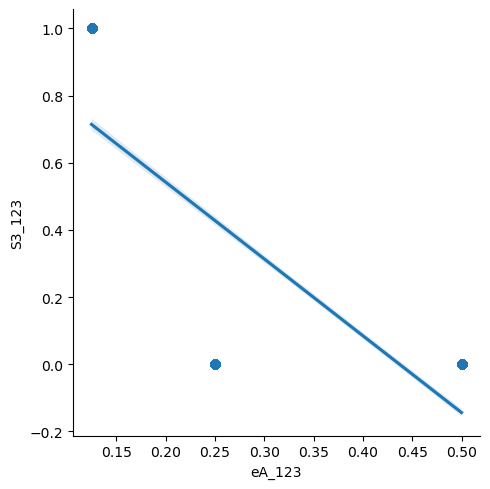

In [170]:
sns.lmplot(
    x = "eA_123",
    y = "S3_123",
    data = for_reg[["eA_123", "S1_123", "S2_123", "S3_123"]]
)